In [ ]:
import pickle

with open('./Models/Graph2SMILES/results/10_Sep/search_tree_0.pkl', 'rb') as f:
    tree = pickle.load(f)

In [3]:
import heapq

class NodeWrapper:
    def __init__(self, node):
        self.node = node

    def __lt__(self, other):
        return float(self.node.score) < float(other.node.score)

    def __le__(self, other):
        return float(self.node.score) <= float(other.node.score)

    def __gt__(self, other):
        return float(self.node.score > other.node.score)

    def __ge__(self, other):
        return float(self.node.score >= other.node.score)


import heapq

def top_K_search(root, K):
    # Priority queue to keep track of top-3 nodes
    top_K = []

    def dfs(node):
        if node is None:
            return

        # Wrap the node and push it into the heap
        heapq.heappush(top_K, NodeWrapper(node))
        # If the heap exceeds size 3, remove the smallest element
        if len(top_K) > K:
            heapq.heappop(top_K)

        # Traverse the children
        for child in node.childrens:
            dfs(child)

    # Start the depth-first search from the root
    dfs(root)

    # Extract the top-3 nodes from the heap
    top_K_nodes = [heapq.heappop(top_K).node for _ in range(len(top_K))]
    top_K_nodes.reverse()  # To get the nodes in descending order of score
    top_K_nodes.pop(0)

    return top_K_nodes

In [4]:
top_3_node = [top_K_search(node, 10) for node in tree]

In [5]:
def get_path(node):
    path = []
    if node.parent:
        path.append(node)
        path += get_path(node.parent)
    else:
        path.append(node)
    return path

In [6]:
top_3_node_paths = [[get_path(node) for node in top_3] for top_3 in top_3_node]

In [7]:
import rdkit
from rdkit import Chem
import random

In [9]:
for i, root_path in enumerate(top_3_node_paths):
    if random.randint(0, len(top_3_node_paths)) == 33:
        for j, path in enumerate(root_path):
            print(f"Root {i + 1}, path {j + 1}:")
            #path.pop()
            path.reverse()
            skip = False
            if not node.match:
                skip = True
            for node in path:
                try:
                    Chem.MolFromSmiles(node.get_rct_smi())
                except:
                    skip = True
                    print(f"Error:  {node.get_rct_smi()} (score: {node.score})")
            if skip:
                continue
            for node in path:
                print(f"  {node.get_rct_smi()} (score: {node.score})")
                print(f"  {node.get_rgt_smi()}")
                display(Chem.MolFromSmiles(node.get_rct_smi()))

Root 281, path 1:


NameError: name 'node' is not defined

Root 115, path 1:
Product:


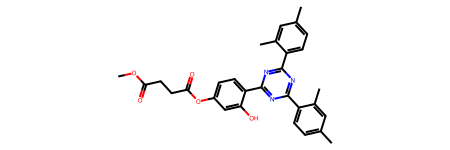

  COC(=O)CCC(=O)Cl.Cc1ccc(-c2nc(-c3ccc(C)cc3C)nc(-c3ccc(O)cc3O)n2)c(C)c1
 (score: 0)
C1CCOC1.CCN(CC)CC
 rct


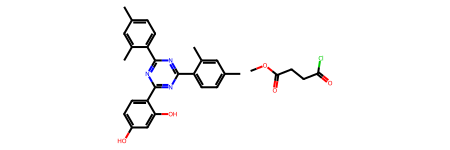

rgt


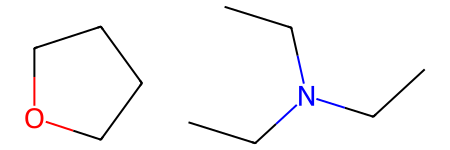

  COC(=O)CCC(=O)Cl.Cc1ccc(-c2nc(-c3ccc([O-])cc3O)nc(-c3ccc(C)cc3C)n2)c(C)c1 (score: -3.8981092075118795e-05)
C1CCOC1.CCN(CC)CC
 rct


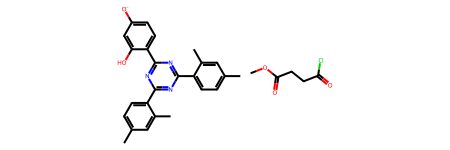

rgt


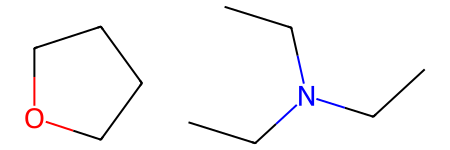

  COC(=O)CCC(=O)Cl.COC(=O)CCC([O-])(Cl)Oc1ccc(-c2nc(-c3ccc(C)cc3C)nc(-c3ccc(C)cc3C)n2)c(O)c1 (score: -2.1457667571667116e-06)
C1CCOC1.CCN(CC)CC
 rct


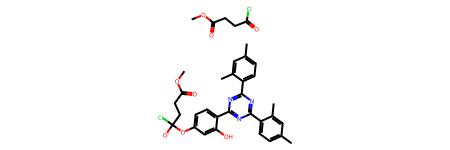

rgt


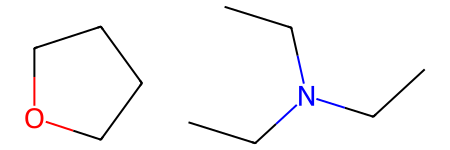

Root 115, path 2:
Product:


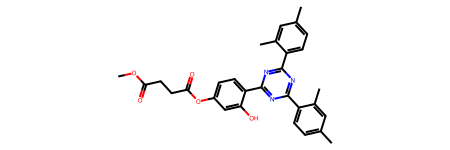

  COC(=O)CCC(=O)Cl.Cc1ccc(-c2nc(-c3ccc(C)cc3C)nc(-c3ccc(O)cc3O)n2)c(C)c1
 (score: 0)
C1CCOC1.CCN(CC)CC
 rct


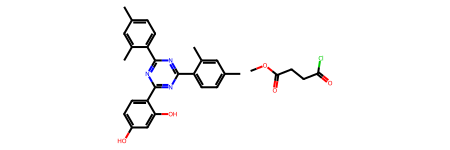

rgt


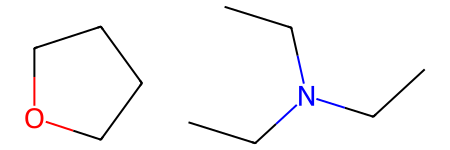

  COC(=O)CCC(=O)Cl.Cc1ccc(-c2nc(-c3ccc([O-])cc3O)nc(-c3ccc(C)cc3C)n2)c(C)c1 (score: -3.8981092075118795e-05)
C1CCOC1.CCN(CC)CC
 rct


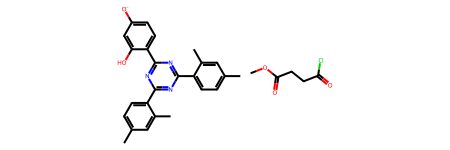

rgt


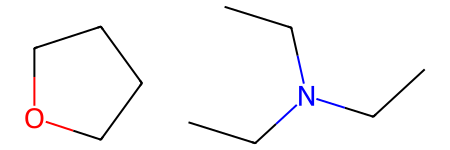

  COC(=O)CCC(=O)Cl.COC(=O)CCC([O-])(Cl)Oc1ccc(-c2nc(-c3ccc(C)cc3C)nc(-c3ccc(C)cc3C)n2)c(O)c1 (score: -2.1457667571667116e-06)
C1CCOC1.CCN(CC)CC
 rct


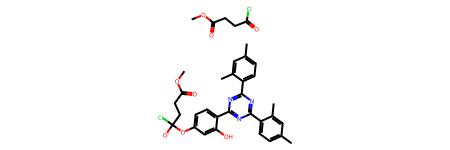

rgt


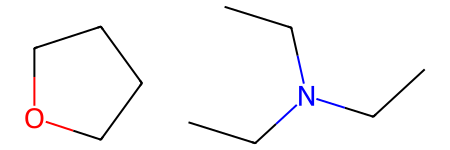

  COC(=O)CCC(=O)Oc1ccc(-c2nc(-c3ccc(C)cc3C)nc(-c3ccc(C)cc3C)n2)c(O)c1END (score: -2.3841855636419496e-06)
C1CCOC1.CCN(CC)CC
 rct


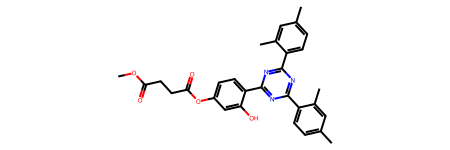

rgt


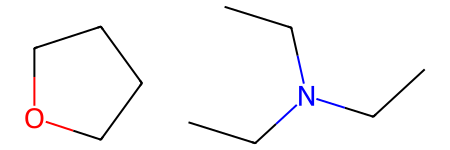

Root 115, path 3:
Root 115, path 4:
Root 115, path 5:
Root 115, path 6:
Product:


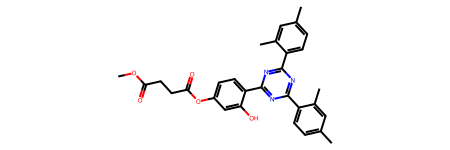

  COC(=O)CCC(=O)Cl.Cc1ccc(-c2nc(-c3ccc(C)cc3C)nc(-c3ccc(O)cc3O)n2)c(C)c1
 (score: 0)
C1CCOC1.CCN(CC)CC
 rct


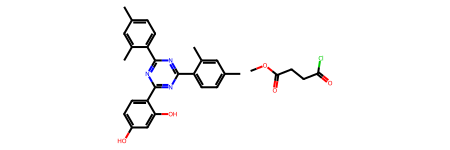

rgt


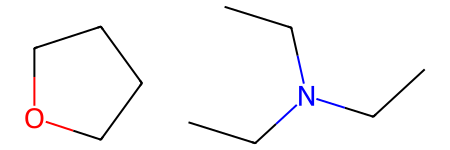

  COC(=O)CCC(=O)Cl.Cc1ccc(-c2nc(-c3ccc([O-])cc3O)nc(-c3ccc(C)cc3C)n2)c(C)c1 (score: -3.8981092075118795e-05)
C1CCOC1.CCN(CC)CC
 rct


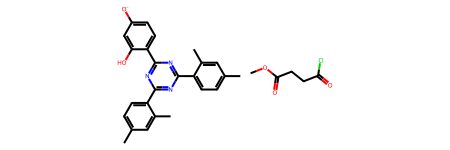

rgt


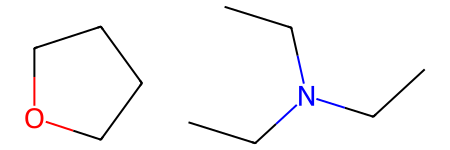

Root 115, path 7:
Root 115, path 8:
Root 115, path 9:


In [29]:
import random

i = random.randint(0, len(top_3_node_paths) - 1)
root_path = top_3_node_paths[i]
for j, path in enumerate(root_path):
    print(f"Root {i + 1}, path {j + 1}:")
    #path.pop()
    path.reverse()
    skip = False
    for node in path:
        if not node.match:
            skip = True
            break
        try:
            Chem.MolFromSmiles(node.get_rgt_smi())
            Chem.MolFromSmiles(node.get_rct_smi().replace('END',''))
            if Chem.MolFromSmiles(node.get_rct_smi().replace('END','')) is None:
                skip = True
        except:
            skip = True
    if skip:
        continue
    print("Product:")
    display(Chem.MolFromSmiles(path[0].get_pdt_smi().replace('END','')))
    for node in path:
        print(f"  {node.get_rct_smi()} (score: {node.score})")
        print(f"{node.get_rgt_smi()} rct")
        display(Chem.MolFromSmiles(node.get_rct_smi().replace('END','')))
        print('rgt')
        display(Chem.MolFromSmiles(node.get_rgt_smi()))

In [211]:
def get_steps(rxn_dict):
    if rxn_dict.get('subsequent mechanisms'):
        return get_steps(rxn_dict['subsequent mechanisms'][0]) + 1
    else:
        return 0
    
def get_mechanism(rxn_dict, step):
    mech_list = []
    rxn_dict = rxn_dict['subsequent mechanisms'][0]
    for i in range(0, step):
        mech_list.append(rxn_dict['Mechanism smi'])
        if rxn_dict.get('subsequent mechanisms'):
            rxn_dict = rxn_dict['subsequent mechanisms'][0]
        else:
            continue
    return mech_list

In [ ]:
import jsonlines

number_of_steps = []
mechanisms = []

with jsonlines.open('./dataset_for_training/unseen_data/Good_Match.json', 'r') as f:
    for i in f:
        number_of_steps.append(get_steps(i))
        mechanisms.append(get_mechanism(i, get_steps(i)))

In [213]:
import copy
top_3_nodes = copy.deepcopy(top_3_node_paths)

In [214]:
for ls in top_3_nodes:
    if ls == []:
        print('No path found')

No path found
No path found
No path found


In [226]:
compare = zip(top_3_nodes, number_of_steps)
print(len(top_3_nodes))
print(len(number_of_steps))
ct = 0
false_step = []
false_pred = []
false_step_pred = []

for index, i in enumerate(compare):
    m, snm = False, False
    if i[0] == []:
        snm = True
    for j in i[0]:
        if j == []:
            snm = True
        if len(j) - 1 == i[1] and j[0].match:
            snm = True
        elif j[0].match and not len(j) == i[1]:
            m = True
    if snm:
        ct += 1
    elif m:
        false_step.append(index)
    else:
        false_step_pred.append(index)

print(ct+len(false_step))
print((ct + len(false_step)) / len(top_3_nodes))
print(f"Accuracy: {ct / len(top_3_nodes)}")
print(f"False step but correct prediction: {len(false_step)}")
print(f"False step and prediction: {len(false_step_pred)}")

1354
1354
1157
0.8545051698670606
Accuracy: 0.8175775480059084
False step but correct prediction: 50
False step and prediction: 197


In [231]:
for root in top_3_nodes:
    for path in root:
        if not path[0].match:
            for node in path:
                print(node.get_rct_smi().strip())
            print('\n')
            print(path[0].get_pdt_smi().strip())
            print('\n\n\n\n\n')
            break

CC(C)(C)[C@@H]1NC(=O)Cc2cccc(c2)OCCCO[C@@H]2C[C@@H](C(=O)O)N(C2)C1=O.CCCC(N)C(O)C(=O)NCC(=O)N[C@H](C(=O)N(C)C)c1ccccc1
CCCC([NH2+]C([O-])(O)C1CC2CN1C(=O)C(C(C)(C)C)NC(=O)Cc1cccc(c1)OCCCO2)C(=O)N(C)C.CCCC(N)C(O)C(=O)NCC(=O)N[C@H](C(=O)N(C)C)c1ccccc1
C=CC(NC([O-])(O)C1CC2CN1C(=O)C(C(C)(C)C)NC(=O)Cc1cccc(c1)OCCCO2)C(=O)N(C)C.CCCC(N)C(O)C(=O)NCC(=O)N[C@H](C(=O)N(C)C)c1ccccc1
C=CC(NC(=O)C1CC2CN1C(=O)C(C(C)(C)C)NC(=O)Cc1cccc(c1)OCCCO2)C(=O)N(C)CEND


CCCC(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)[C@H](C(C)(C)C)NC(=O)Cc1cccc(c1)OCCCO2)C(O)C(=O)NCC(=O)N[C@H](C(=O)N(C)C)c1ccccc1






Cc1cc(Cl)nc2c1c(=O)cc(Nc1ccccc1)n2-c1ccccc1.O=C=Nc1ccc(F)cc1
Cc1cc(Cl)nc2c1c(=O)cc(Nc1ccccc1)n2-c1ccccc1.[O-]C=Nc1ccc(F)cc1
Cc1cc(OC=Nc2ccc(F)cc2)nc2c1c(=O)cc(Nc1ccccc1)n2-c1ccccc1END


Cc1cc(Cl)nc2c1c(=O)cc(N(C(=O)Nc1ccc(F)cc1)c1ccccc1)n2-c1ccccc1






Cc1cc(C(O)c2ccc(F)cc2)c(C(=O)O)o1
Cc1cc(C([OH2+])c2ccc(F)cc2)c(C(=O)[O-])o1


Cc1cc(Cc2ccc(F)cc2)c(C(=O)O)o1






CC(=O)c1ccccc1Br
C=C(O)c1ccccc1Br
[O-]C(CC(=[OH+])c1ccccc1B

In [130]:
false_predict = []

for index, node in enumerate(tree):
    if not node.match:
        false_predict.append(index)

{'Ground truth product': '[Br:12][c:8]1[cH:7][cH:6][c:5]2[O:4][CH2:3][C@H:2]([O:11][c:10]2[cH:9]1)[CH2:1][O:13][c:14]1[cH:19][cH:18][cH:17][cH:16][cH:15]1',
 'Reaction': 'O[CH2:1][C@@H:2]1[CH2:3][O:4][c:5]2[cH:6][cH:7][c:8]([cH:9][c:10]2[O:11]1)[Br:12].[OH:13][c:14]1[cH:15][cH:16][cH:17][cH:18][cH:19]1>c1ccc(cc1)P(c1ccccc1)c1ccccc1.CCOC(=O)N=NC(=O)OCC.C1CCOC1>[Br:12][c:8]1[cH:7][cH:6][c:5]2[O:4][CH2:3][C@H:2]([O:11][c:10]2[cH:9]1)[CH2:1][O:13][c:14]1[cH:19][cH:18][cH:17][cH:16][cH:15]1',
 'Reaction index': 14242,
 'alive': True,
 'subsequent mechanisms': [{'ID': 0,
                            'Mechanism name': 'Deprotonation',
                            'Mechanism smi': 'O[CH2:1][C@@H:2]1[CH2:3][O:4][c:5]2[cH:6][cH:7][c:8]([cH:9][c:10]2[O:11]1)[Br:12].[OH:13][c:14]1[cH:15][cH:16][cH:17][cH:18][cH:19]1.c1ccc(cc1)P(c1ccccc1)c1ccccc1.CCOC(=O)N=NC(=O)OCC.C1CCOC1>>[OH2+:13][c:14]1[cH:15][cH:16][cH:17][cH:18][cH:19]1',
                            'Radius': 3,
                            'St

3
